# **Pr치ctica 3 : An치lisis de Se침ales ECG**



*   Antonia Yepes Quintero - 1036960061
*   Isabella Bedoya Orozco - 1001013873



In [64]:
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
import scipy.stats as st
from scipy.stats import kstest, norm, levene, ttest_ind, mannwhitneyu
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data = sio.loadmat ('/content/drive/MyDrive/Colab Notebooks/signals.mat')
print(data.keys())
ecg_filtrada = data['ECG_filtered'].flatten()
ecg_cruda = data['ECG_asRecording'].flatten()
print(ecg_filtrada.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])
(30720,)


La funci칩n RMS permite calcular el valor cuadr치tico medio de una se침al y se define en forma discreta con N n칰mero de muestras como:

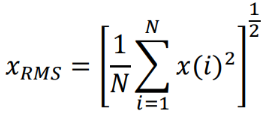


Creaci칩n de la funci칩n RMS:

In [66]:
def calcular_rms(signal):
  N = len(signal)
  valor_rms = np.sqrt(np.sum(signal**2)/N)
  return valor_rms

Se crea el vector de tiempo para ambas se침ales:

In [67]:
Fs = 1024  # Frecuencia de muestreo en Hz
T = 1 / Fs
muestras = (ecg_cruda.size)
t = np.arange(0,muestras*T, T)
print(t)

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


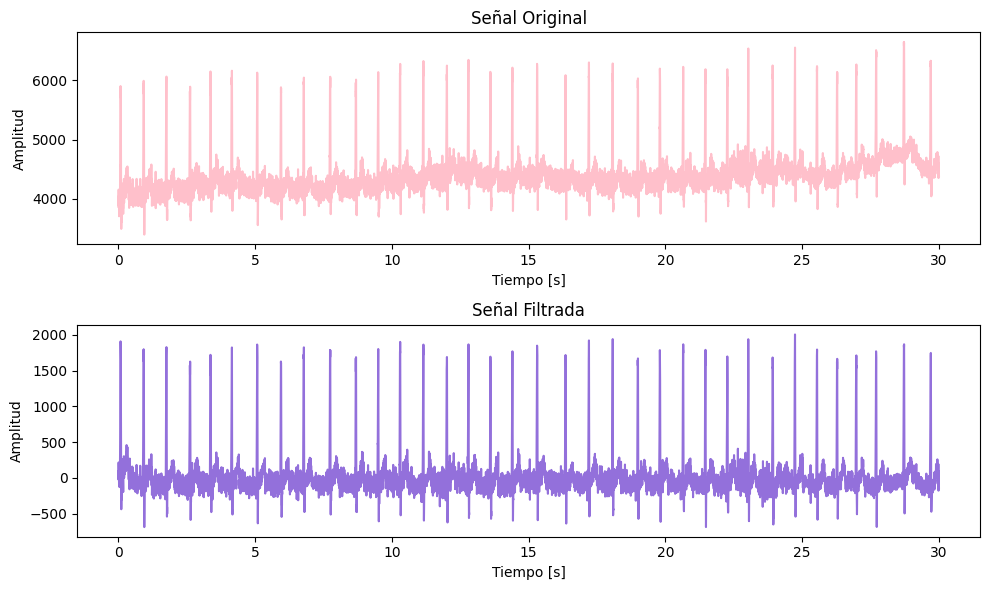

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.subplot(2, 1, 1)
plt.plot(t,ecg_cruda, color = 'pink')
plt.title('Se침al Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t,ecg_filtrada, color = 'mediumpurple')
plt.title('Se침al Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()


**Observaciones:**
La se침al original presenta un alto nivel de ruido, con oscilaciones adicionales a las respectivas del latido del coraz칩n. Adem치s, de un desplazamiento estando centrada alrededor de los 4000.
En cambio, la se침al filtrada muestra una notable reduccion del ruido y esta centrada en 0, lo que indica que el filtro aplicado a corregido el desplazamiento (offset). Los picos de los latidos del coraz칩n permanecen en la se침al filtrada, lo que sugiere que el filtro ha eliminado componentes no deseadas sin comprometer los datos relacionados al ECG. Es probable que el filtro utilizado haya sido un pasa-bajo o basa-banda, el cual puede preservar las frecuencias relevantes para el ECG y reducir tanto el ruido de alta frecuencia como el desplazamiento de base.


Graficaci칩n de un ciclo cardiaco de la se침al original:

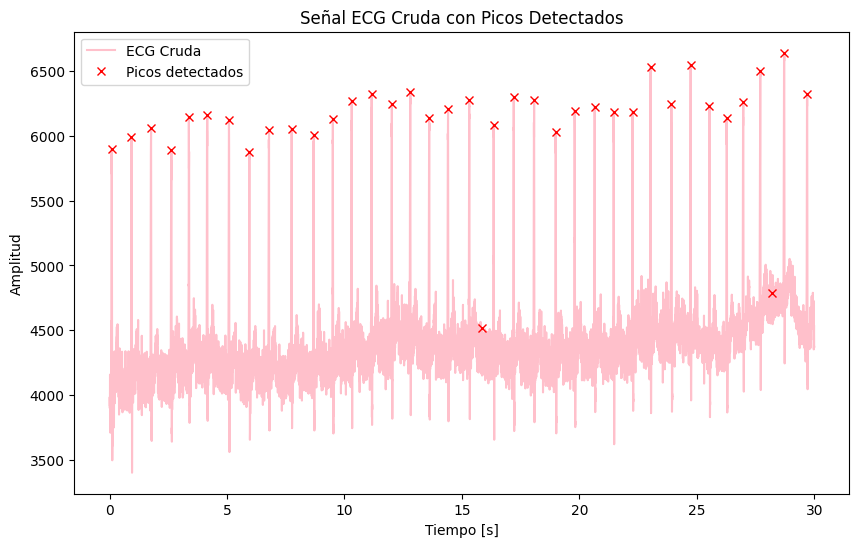

In [69]:
peaks, _ = find_peaks(ecg_cruda, distance=Fs/2, height=0)  # Ajustar los par치metros si es necesario
plt.figure(figsize=(10, 6))
plt.plot(t, ecg_cruda, label='ECG Cruda', color='pink')
plt.plot(t[peaks], ecg_cruda[peaks], 'rx', label='Picos detectados')
plt.title('Se침al ECG Cruda con Picos Detectados')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Text(0, 0.5, 'Amplitud')

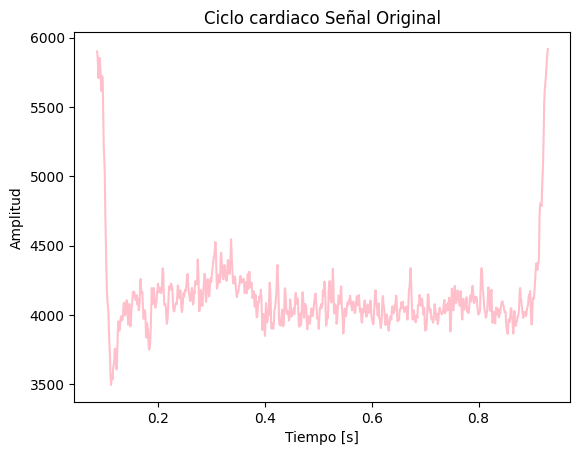

In [70]:
t_ciclo = t[peaks[0]:peaks[1]]
ciclo_cruda = ecg_cruda[peaks[0]:peaks[1]]
plt.plot(t_ciclo, ciclo_cruda, color = 'pink')
plt.title('Ciclo cardiaco Se침al Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

Estad칤sticas:

In [71]:
# Calcular promedio
promedio_crudo = np.mean(ecg_cruda)
print("El promedio de la se침al original es: ", promedio_crudo)

# Calcular RMS
RMS_cruda = calcular_rms(ecg_cruda)
print("El RMS de la se침al original es: ", RMS_cruda)

# Calcular la Varianza
varianza_cruda = np.var(ecg_cruda)
print("La varianza de la se침al original es: ", varianza_cruda)

# Calcular Desviaci칩n est치ndar
desviacion_estandar_cruda = np.std(ecg_cruda)
print("La desviaci칩n est치ndar de la se침al original es: ", desviacion_estandar_cruda)



El promedio de la se침al original es:  4381.171892023087
El RMS de la se침al original es:  4392.9682937490725
La varianza de la se침al original es:  103503.2824314821
La desviaci칩n est치ndar de la se침al original es:  321.7192602743611


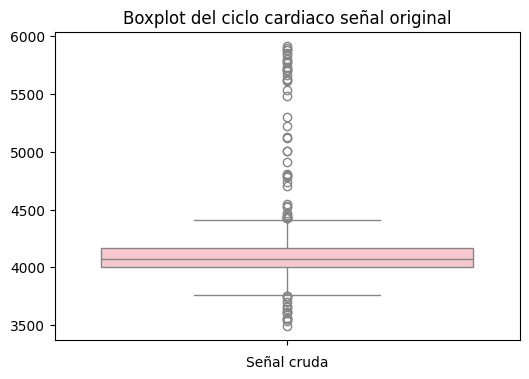

In [72]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(ciclo_cruda, color='pink')
plt.title('Boxplot del ciclo cardiaco se침al original')
plt.xlabel('Se침al cruda')
plt.show()

**Analisis de los resultados:**

* La mayor parte de los valores de amplitud est치n agrupados alrededor del promedio 4381. Esto sugiere que hay un desplazamiento de base o offset en la se침al, ya que no est치 centrada en cero.
* La magnitud promedio de la se침al es cercana a 4393, lo que indica que los valores de la se침al se mantienen relativamente constantes en torno al promedio.
* La varianza es de 103503.28, lo que significa que hay una gran dispersi칩n de valores en la se침al ECG, pudiendo ser por los picos altos que representan los latidos y las areas mas bajas entre cada latido. Adem치s, La varianza tambi칠n puede estar influenciada por ruido o artefactos en la se침al, especialmente si hay muchos valores at칤picos o fluctuaciones extremas.
* La desviaci칩n est치ndar de 321.72 muestra que hay muchas fluctuaciones alrededor del promedio, lo que refleja la variabilidad de los picos y las ca칤das en la se침al ECG.

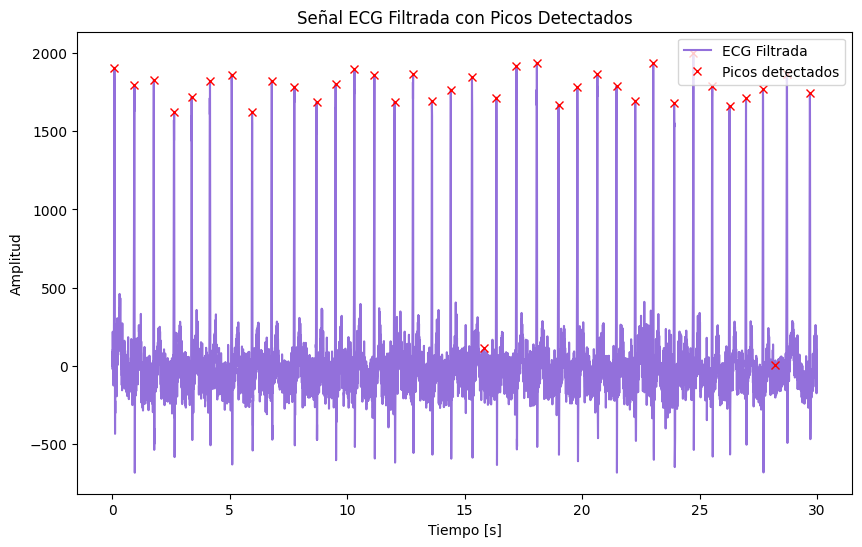

In [73]:
peaks, _ = find_peaks(ecg_filtrada, distance=Fs/2, height=0)  # Ajustar los par치metros si es necesario
plt.figure(figsize=(10, 6))
plt.plot(t, ecg_filtrada, label='ECG Filtrada', color='mediumpurple')
plt.plot(t[peaks], ecg_filtrada[peaks], 'rx', label='Picos detectados')
plt.title('Se침al ECG Filtrada con Picos Detectados')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Text(0, 0.5, 'Amplitud')

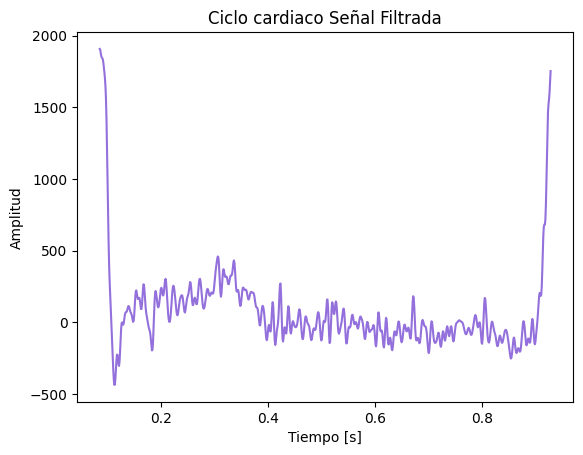

In [74]:
t_ciclo = t[peaks[0]:peaks[1]]
ciclo_filtrada = ecg_filtrada[peaks[0]:peaks[1]]
plt.plot(t_ciclo, ciclo_filtrada, color = 'mediumpurple')
plt.title('Ciclo cardiaco Se침al Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

In [75]:
# Calcular promedio
promedio_filtrado = np.mean(ecg_filtrada)
print("El promedio de la se침al filtrada es: ", promedio_filtrado)

# Calcular RMS
RMS_filtrada = calcular_rms(ecg_filtrada)
print("El RMS de la se침al filtrada es: ", RMS_filtrada)

# Calcular la Varianza
varianza_filtrada = np.var(ecg_filtrada)
print("La varianza de la se침al filtrada es: ", varianza_filtrada)

# Calcular Desviaci칩n est치ndar
desviacion_estandar_filtrada = np.std(ecg_filtrada)
print("La desviaci칩n est치ndar de la se침al filtrada es: ", desviacion_estandar_filtrada)


El promedio de la se침al filtrada es:  3.1776396646094827
El RMS de la se침al filtrada es:  286.30557115249496
La varianza de la se침al filtrada es:  81960.78267911829
La desviaci칩n est치ndar de la se침al filtrada es:  286.2879366636294


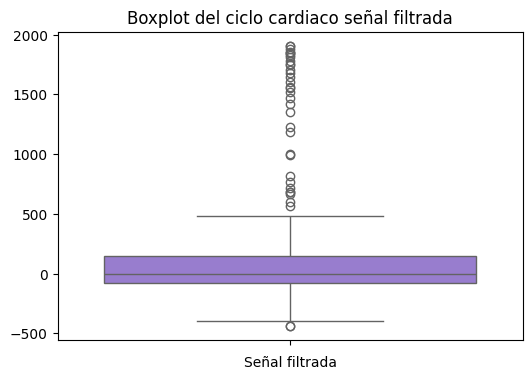

In [76]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(ciclo_filtrada, color='mediumpurple')
plt.title('Boxplot del ciclo cardiaco se침al filtrada')
plt.xlabel('Se침al filtrada')
plt.show()

**An치lisis de los resultados:**

* El promedio ahora es 3.18, lo que muestra que el filtrado ha corregido ese desplazamiento y ha centrado la se침al en torno a cero.

* El RMS ha disminuido significativamente a 286.31, lo que indica que la se침al es ahora m치s suave, con menos energ칤a no deseada.

* La varianza ha disminuido a 81960.78, lo que muestra que la se침al tiene menos fluctuaciones extremas, aunque los picos cardiacos a칰n generan dispersi칩n.

*  La desviaci칩n est치ndar ha bajado a 286.29, lo que muestra una reducci칩n en la variabilidad de la se침al, aunque a칰n persisten algunas fluctuaciones, debido a los picos de los latidos.

Extracci칩n de 15 ciclos para la se침al filtrada:

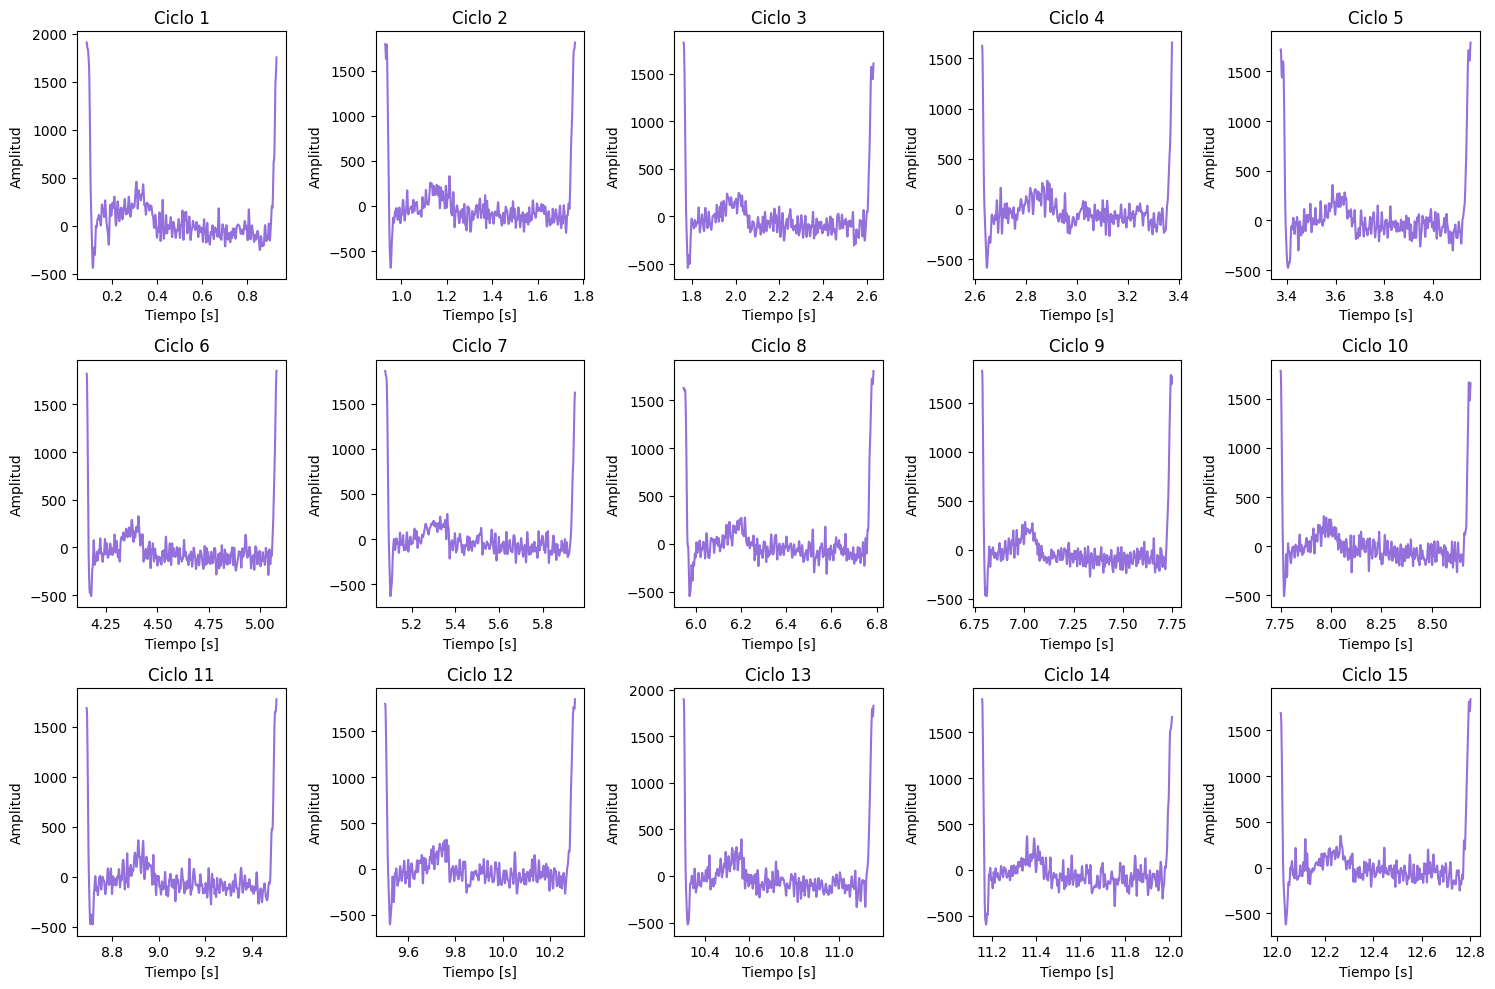

Ciclo 1: Promedio = 74.0100, Varianza = 96684.3149
Ciclo 2: Promedio = -1.4626, Varianza = 104790.4655
Ciclo 3: Promedio = -10.4330, Varianza = 82451.2511
Ciclo 4: Promedio = -20.9752, Varianza = 46839.0197
Ciclo 5: Promedio = 40.8711, Varianza = 114850.0201
Ciclo 6: Promedio = -27.9437, Varianza = 58147.5895
Ciclo 7: Promedio = 0.4308, Varianza = 77707.2812
Ciclo 8: Promedio = 21.4079, Varianza = 100268.1815
Ciclo 9: Promedio = -10.1753, Varianza = 71784.9558
Ciclo 10: Promedio = 8.8121, Varianza = 68481.0598
Ciclo 11: Promedio = -8.9062, Varianza = 76088.3849
Ciclo 12: Promedio = 13.2133, Varianza = 93862.6959
Ciclo 13: Promedio = -4.2033, Varianza = 87951.5045
Ciclo 14: Promedio = -14.9697, Varianza = 77022.1329
Ciclo 15: Promedio = 27.1083, Varianza = 89636.9356


In [77]:
# Extracci칩n de 15 ciclos
ciclos = []
promedios = []
varianzas = []

fig, axs = plt.subplots(3, 5, figsize=(15, 10))  # 3 filas y 5 columnas

for i in range(15):
    ciclo_actual = ecg_filtrada[peaks[i]:peaks[i+1]]
    ciclos.append(ciclo_actual)
    promedio_ciclo = np.mean(ciclo_actual)
    promedios.append(promedio_ciclo)
    varianza_ciclo = np.var(ciclo_actual)
    varianzas.append(varianza_ciclo)

    t_ciclo = t[peaks[i]:peaks[i+1]]

    # Definir la posici칩n en el subplot
    row = i // 5
    col = i % 5

    # Graficar el ciclo en la posici칩n correspondiente
    axs[row, col].plot(t_ciclo, ciclo_actual, color='mediumpurple')
    axs[row, col].set_title(f'Ciclo {i+1}')
    axs[row, col].set_xlabel('Tiempo [s]')
    axs[row, col].set_ylabel('Amplitud')

# Ajustar la distribuci칩n del gr치fico
plt.tight_layout()
plt.show()

# Mostrar los promedios y varianzas de cada ciclo
for i in range(15):
    print(f"Ciclo {i+1}: Promedio = {promedios[i]:.4f}, Varianza = {varianzas[i]:.4f}")


**An치lisis grafico y estadistico**

**An치lisis grafico:**

  * Los 15 ciclos gr치ficos muestran una estructura muy similar, sin embargo, las fluctuaciones entre los picos var칤an en amplitud y forma en cada ciclo.
  * Algunos ciclos tienen mayores oscilaciones, mientras que otros son m치s estables (con amplitudes m치s bajas).
  
  Estas diferencias visuales entre los ciclos sugiere que la se침al no es constante.

**An치lisis estadistico**

* Los promedios de los ciclos var칤an considerablemente. Van desde valores negativos hasta valores positivo. Estos cambios en el promedio indica que la se침al no se mantiene estable a lo largo de todos los ciclos.

* La varianza, que mide la dispersi칩n de los valores de cada ciclo, tambi칠n muestra una alta variabilidad. Algunas varianzas son mucho mayores que otras, por ejemplo, el ciclo 2 tiene una varianza de 104790.47, mientras que el ciclo 6 tiene una varianza mucho menor de 58147.59. Esto sugiere que algunos ciclos tienen fluctuaciones mucho m치s extremas que otros, lo que contribuye a que la se침al sea menos estable.

No se puede considerar que la se침al es estacionaria debido a la variabilidad en las estad칤sticas de cada ciclo y la diferencia en el comportamiento gr치fico entre ciclos. Tanto los gr치ficos como los valores del promedio y la varianza demuestran que la se침al cambia con el tiempo, lo que es indicativo de una se침al no estacionaria.

## Comparaci칩n entre el ciclo 2 y ciclo 5


**Normalidad:**

Prueba de Kolmogorov-Smirnov

**Hip칩tesis:**

p > alpha

*   H0: Los datos parecen normales (No se puede rechazar H0)
*   H1: Los datos no parecen normales (Se rechaza H0)



In [78]:
ciclo_dos = ciclos[1]
ciclo_cinco = ciclos[4]

ks_stats2, p_value2 = kstest(ciclo_dos, 'norm')
print('stat=%.3f, p=%.3f' % (ks_stats2, p_value2))

if p_value2 > 0.05:
  print('Los datos parecen normales (No se puede rechazar H0)')
else:
  print('Los datos no parecen normales (Se rechaza H0)')


stat=0.708, p=0.000
Los datos no parecen normales (Se rechaza H0)


In [79]:
ks_stats5, p_value5 = kstest(ciclo_cinco, 'norm')
print('stat=%.3f, p=%.3f' % (ks_stats5, p_value5))

if p_value5 > 0.05:
  print('Los datos parecen normales (No se puede rechazar H0)')
else:
  print('Los datos no parecen normales (Se rechaza H0)')

stat=0.587, p=0.000
Los datos no parecen normales (Se rechaza H0)


Tanto para el ciclo 2 como para el ciclo 5, se rechaza la hip칩tesis nula H0, lo que significa que los datos no siguen una distribuci칩n normal. Esto se deduce del valor p = 0.000, que es menor al nivel de significancia alpha = 0.05.
Esto implica que, estad칤sticamente, los datos de ambos ciclos no pueden ser considerados como normalmente distribuidos, lo que afecta la validez de pruebas param칠tricas tradicionales como la t de Student.

**Homocedasticidad:**

Prueba de Levene

**Hip칩tesis:**

*   H0: Los grupos tienen varianzas iguales
*   H1: Los grupos tienen varianzas diferentes



In [80]:
stat_levene, p_levene = levene(ciclo_dos, ciclo_cinco)
print('stat=%.3f, p=%.3f' % (stat_levene, p_levene))

if p_levene > 0.05:
  print('Los grupos tienen varianzas iguales (No se puede rechazar H0)')
else:
  print('Los grupos tienen varianzas diferentes (Se rechaza H0)')

stat=0.607, p=0.436
Los grupos tienen varianzas iguales (No se puede rechazar H0)


La prueba de Levene para la homocedasticidad muestra un valor p = 0.436, lo que significa que no se puede rechazar la hip칩tesis nula H0 de que los dos ciclos tienen varianzas iguales.
Esto indica que, aunque los datos no son normales, los ciclos 2 y 5 tienen varianzas similares, lo que es un requisito para aplicar algunas pruebas estad칤sticas, como la prueba t aunque en este caso, optamos por una prueba no param칠trica.

**Independencia**

Se asume que los grupos son independientes

**U Mann-Whitney-Wilcoxon**

* HO: No hay diferencia (en t칠rminos de tendencia central) entre los dos grupos de la poblaci칩n.
* H1: Existe una diferencia (con respecto a la tendencia central) entre los dos grupos de la poblaci칩n.

Las condiciones del u-test son:

* Los datos tienen que ser independientes.

* Los datos tienen que ser ordinales.

* No es necesario asumir que las muestras se distribuyen de forma normal.

* Igualdad de varianza entre grupos (homocedasticidad).

In [81]:
stat_mann, p_mann = mannwhitneyu(ciclo_dos, ciclo_cinco)
print('stat=%.3f, p=%.0f' % (stat_mann, p_mann))

if p_mann > 0.05:
  print('No se puede rechazar H0, no hay diferencias significativas entre los ciclos.')
else:
  print('Se rechaza H0, hay diferencias significativas entre los ciclos.')

stat=285265.000, p=0
Se rechaza H0, hay diferencias significativas entre los ciclos.


Se rechaza la hip칩tesis nula, lo que indica que hay diferencias significativas entre los dos grupos. Esto significa que los datos de los grupos probablemente provienen de distribuciones diferentes.

La prueba de Mann-Whitney muestra un valor p = 0, lo que significa que se rechaza la hip칩tesis nula. Esto indica que hay diferencias significativas entre los ciclos 2 y 5.
Esto sugiere que las distribuciones de los valores de los dos ciclos son diferentes, lo que implica que estos dos ciclos tienen caracter칤sticas distintas.

**An치lisis ciclo 2 y 5**



## Comparaci칩n entre el ciclo 13 y ciclo 15

**Normalidad:**

Prueba de Kolmogorov-Smirnov

**Hip칩tesis:**

p > alpha

*   H0: Los datos parecen normales (No se puede rechazar H0)
*   H1: Los datos no parecen normales (Se rechaza H0)


In [82]:
ciclo_13 = ciclos[12]
ciclo_15 = ciclos[14]

ks_stats13, p_value13 = kstest(ciclo_13, 'norm')
print('stat=%.3f, p=%.3f' % (ks_stats13, p_value13))

if p_value13 > 0.05:
  print('Los datos parecen normales (No se puede rechazar H0)')
else:
  print('Los datos no parecen normales (Se rechaza H0)')

stat=0.704, p=0.000
Los datos no parecen normales (Se rechaza H0)


In [83]:
ks_stats15, p_value15 = kstest(ciclo_15, 'norm')
print('stat=%.3f, p=%.3f' % (ks_stats15, p_value15))

if p_value15 > 0.05:
  print('Los datos parecen normales (No se puede rechazar H0)')
else:
  print('Los datos no parecen normales (Se rechaza H0)')

stat=0.587, p=0.000
Los datos no parecen normales (Se rechaza H0)


Para ambos ciclos, 13 y 15, se rechaza la hip칩tesis nula, lo que indica que los datos no siguen una distribuci칩n normal. Este resultado se puede observar debido a los valores de p = 0.000, que son menores al nivel de significancia 洧띺 = 0.05.
Esto implica que las se침ales de ambos ciclos tienen una distribuci칩n que no es normal, lo que afecta la validez de pruebas param칠tricas tradicionales como la t de Student.

**Homocedasticidad:**

Prueba de Levene

**Hip칩tesis:**

*   H0: Los grupos tienen varianzas iguales
*   H1: Los grupos tienen varianzas diferentes

In [84]:
stat_levene, p_levene = levene(ciclo_13, ciclo_15)
print('stat=%.3f, p=%.3f' % (stat_levene, p_levene))

if p_levene > 0.05:
  print('Los grupos tienen varianzas iguales (No se puede rechazar H0)')
else:
  print('Los grupos tienen varianzas diferentes (Se rechaza H0)')

stat=0.198, p=0.656
Los grupos tienen varianzas iguales (No se puede rechazar H0)


La prueba de Levene muestra un valor p = 0.656, lo que significa que no se puede rechazar la hip칩tesis nula ya que las varianzas de los ciclos 13 y 15 son iguales. Esto indica que, a pesar de que los datos no son normales, las variaciones de amplitud en ambos ciclos tienen una dispersi칩n similar, lo cual es un aspecto importante para validar algunas pruebas estad칤sticas no param칠tricas.

**Independencia**

Se asume que los grupos son independientes

**U Mann-Whitney-Wilcoxon**

* HO: No hay diferencia (en t칠rminos de tendencia central) entre los dos grupos de la poblaci칩n.
* H1: Existe una diferencia (con respecto a la tendencia central) entre los dos grupos de la poblaci칩n.

Las condiciones del u-test son:

* Los datos tienen que ser independientes.

* Los datos tienen que ser ordinales.

* No es necesario asumir que las muestras se distribuyen de forma normal.

* Igualdad de varianza entre grupos (homocedasticidad).


In [85]:
stat_mann, p_mann = mannwhitneyu(ciclo_13, ciclo_15)
print('stat=%.3f, p=%.0f' % (stat_mann, p_mann))

if p_mann > 0.05:
  print('No se puede rechazar H0, no hay diferencias significativas entre los ciclos.')
else:
  print('Se rechaza H0, hay diferencias significativas entre los ciclos.')

stat=293838.000, p=0
Se rechaza H0, hay diferencias significativas entre los ciclos.


El valor p = 0 para la prueba de Mann-Whitney indica que se rechaza la hip칩tesis nula, lo que significa que existen diferencias significativas entre los ciclos 13 y 15.
Esto sugiere que los dos ciclos tienen distribuciones diferentes en cuanto a sus valores de amplitud, lo que implica que sus comportamientos a lo largo del tiempo son distintos.

**Estacionariedad**

Prueba de Dickey-Fuller

* HO: La serie temporal no es estacionaria, es decir, tiene una estructura que depende del tiempo y no presenta una varianza constante a lo largo del tiempo.

* H1: La serie temporal es estacionaria.

Estad칤stico ADF: Es el valor que indica qu칠 tan lejos est치 la serie de ser estacionaria (valores m치s negativos indican estacionariedad).

Valores cr칤ticos: Estos son los valores del estad칤stico ADF que debes comparar para niveles de significancia del 1%, 5%, y 10%.

In [86]:
result = adfuller(ecg_filtrada)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
  print("La serie temporal es estacionaria.")
else:
  print("La serie temporal no es estacionaria.")

ADF Statistic: -0.654659
p-value: 0.858147
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
La serie temporal no es estacionaria.


La se침al no es estacionaria, es probable que esto afecte las comparaciones entre los ciclos. Es decir, la no estacionariedad podr칤a ser la raz칩n de las diferencias entre ciclos, ya que las propiedades de la se침al cambian a lo largo del tiempo, lo cual es consistente con el an치lisis anterior donde se observaron fluctuaciones en la se침al a lo largo de los ciclos.